## Soal Nomor 1 :

Dalam Nomor Tersebut diberikan suatu algoritma pencarian solusi akar dalam sebuah fungsi real.dalam metode tersebut diadaptasi dari metode secant berasal dari modifikasi newton berikut :

diberikan sebuah fungsi : 𝑓(𝑥) = ln(𝑥 − 1) + cos(𝑥 − 1) − 0.2
akan dicari akar dari fungsi tersebut dengan menggunakan beberapa parameter yaitu penentuan titik awal dan sebagainya.

#### Import Liblary :

Import beberapa lib yang berhubungan dengan fungsi yang ada

In [1]:
from math import exp,pi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sin,cos,tan,exp,log
from numpy import log as ln

#### Mendefinsikan fungsi dalam permasalahan

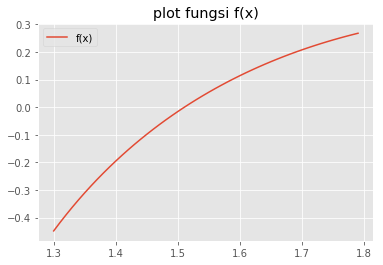

In [4]:

def f(x):
    return (ln(x-1)+cos(x-1)-0.2)
interval=np.arange(1.3,1.8,0.01)
hasil_plot=[]
%matplotlib inline
for i in interval:
    hasil_plot.append(f(i))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title('plot fungsi f(x)')
plt.plot(interval,hasil_plot,label='f(x)')
plt.legend()

dari fungsi plot terlihat bahwa fungsi terebut memotong sumbu x pada x mendekati 1.5 namun kita akan mencoba untuk melakukan aproksimasi nilai tersebut

## Pendefinsian Fungsi Secant dalam mencari akar

In [10]:
from numpy import sin,cos,log,exp
def Secant():
    N=eval(input('sampai berapa iterasi yang dinginkan jika barisan tak konvergen ? : '))
    tolerance=eval(input('toleransi yang dinginkan pada program ? : '))
    p0=eval(input('nilai awal ? : '))
    p1=p0+10**(-10)
    secant_list=[p0,p1]
    p = p1 - (f(p1)*(p1-p0))/(f(p1)-f(p0))            #metode secant (iterasi pertama)
    abs_error = abs(p-p1)
    p0 = p1                                           #disini p0 itu kayak p(n-2)
    p1 = p
    
    error=0
    for i in range(N):
        if abs(f(p))<tolerance:
            break
        else:
            p = p1 - (f(p1)*(p1-p0))/(f(p1)-f(p0))       
                                                           #metode secant (iterasi selanjutnya)
            p0 = p1                                           #disini p0 itu kayak p(n-2)
            p1 = p      #p1 itu kayak p(n-1)
            secant_list.append(p)
    return secant_list

dalam fungsi tersebut kita memerlukan nila awal yang akan kita coba pilih diantara 1.3 dan 1.8 misalkan kita pilih 1.4 untuk nilai awalnya dan proses berhentinya kita akan tentukan sebesar 100

In [11]:
secant_hasil=Secant()

sampai berapa iterasi yang dinginkan jika barisan tak konvergen ? : 100
toleransi yang dinginkan pada program ? : 0.001
nilai awal ? : 1.4


In [12]:
akar_secant=pd.DataFrame(secant_hasil,columns=['akar secant'])
akar_secant

,akar secant
0,1.400000
1,1.400000
2,1.507414
3,1.510323


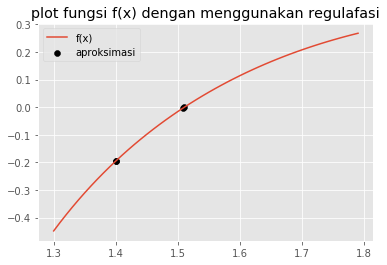

In [26]:
import matplotlib.pyplot as plt
hasil_f=[]
for i in secant_hasil:
    hasil_f.append(f(i))
import seaborn as sns
plt.title('plot fungsi f(x) dengan menggunakan regulafasi')
plt.plot(interval,hasil_plot,label='f(x)')
plt.scatter(secant_hasil,hasil_f,color='black',label='aproksimasi')
plt.legend()

Diatas Merupakan hasil dari metode secant.Jika kita memilih titik awalnya 2.5 atau 2.3 maka yang akan kita dapatkan :

In [13]:
opsilain=Secant()
akar_lain=pd.DataFrame(opsilain,columns=['akar secant'])
akar_lain

sampai berapa iterasi yang dinginkan jika barisan tak konvergen ? : 100
toleransi yang dinginkan pada program ? : 0.001
nilai awal ? : 2.5


,akar secant
0,2.500000
1,2.500000
2,3.220347
3,3.198016


In [38]:
opsilain=Secant()
akar_lain=pd.DataFrame(opsilain,columns=['akar secant'])
akar_lain

sampai berapa iterasi yang dinginkan jika barisan tak konvergen ? : 100
toleransi yang dinginkan pada program ? : 0.001
nilai awal ? : 2.3


,akar secant
0,2.300000
1,2.300000
2,3.627709
3,6.637726
4,3.757275
5,3.890389
6,6.444228
7,4.011018
8,4.107405
9,4.375653


di dapatkan bahwa nilainya menjauhi dari akar aslinya yang nilainya mendekati 1.5 sekian,sehingga nomor satu sudah terjawab.

# Soal Nomor 3

dalam nomor ini kita diminta untuk melakukan faktorisasi menggunakan metode LU yang menhaslkan O(h^2)

#### Pendefinisian Matrix :

In [15]:
matrix=np.matrix([[2,-1,1],[3,3,9],[3,3,5]])

In [16]:
print(matrix)

[[ 2 -1  1]
 [ 3  3  9]
 [ 3  3  5]]


diatas merupakan matrix yang akan kita coba faktorisasikan sehingga nantinya kita mendapatkan output berupa matriks segita atas dan bawah.

#### Pendefinisian Faktorisasi Matrix :

In [17]:
import numpy as np
matrix = np.array(eval(input("Masukan matriks yang akan di faktorisasi :\n")))

def LUFactorization(matrix):
    n = np.shape(matrix)[0] #baris matrix
    L = np.identity(n)  #Pertama L didefinisikan sebagai matrix indentitas nxn
    #operasi baris elementer
    for i in range(n):
        for j in range(i+1,n):
            m = matrix[j,i]/matrix[i,i]
            L[j,i] = m #Pasang elemen L_ji menjadi multiplisitas m = a_ji/a_ii
            matrix[j]= matrix[j]-m*matrix[i]
    return (L,matrix)  
L = LUFactorization(matrix)[0]
U = LUFactorization(matrix)[1]
print("faktorisasi LU matriksnya adalah :\n L = {0}".format(L))  #print L
#print U
print("U = {0}".format(U))
LU = np.dot(L,U)   #Hasil perkalian L dan U
print(LU)

Masukan matriks yang akan di faktorisasi :
[[2,-1,1],[3,3,9],[3,3,5]]
faktorisasi LU matriksnya adalah :
 L = [[1.  0.  0. ]
 [1.5 1.  0. ]
 [1.5 1.  1. ]]
U = [[ 2 -1  1]
 [ 0  4  7]
 [ 0  0 -4]]
[[ 2.  -1.   1. ]
 [ 3.   2.5  8.5]
 [ 3.   2.5  4.5]]


Dalam Algoritma Diatas Kita dapatkan bahwa nilai dari Faktorisasi dengan menggunakan LU kita dapatkan matriksnya adalah :

Untuk Nila L :

In [21]:
np.matrix([[1.,0.,  0. ],[1.5, 1.,  0. ],[1.5 ,1.,  1. ]])

matrix([[1. , 0. , 0. ],
        [1.5, 1. , 0. ],
        [1.5, 1. , 1. ]])

Untuk Nilai U :

In [22]:
np.matrix([[ 2, -1,  1],
 [ 0,  4 , 7],
 [ 0 , 0 ,-4]])

matrix([[ 2, -1,  1],
        [ 0,  4,  7],
        [ 0,  0, -4]])

dan hasil dari perkalian matriks tersebut adalah 

In [24]:
U=np.matrix([[ 2, -1,  1],
 [ 0,  4 , 7],
 [ 0 , 0 ,-4]])
L=np.matrix(np.matrix([[1.,0.,  0. ],[1.5, 1.,  0. ],[1.5 ,1.,  1. ]]))

LU=np.dot(L,U)
print(LU)

[[ 2.  -1.   1. ]
 [ 3.   2.5  8.5]
 [ 3.   2.5  4.5]]


# Soal Nomor 4

Metode Gauss-Seidel adalah perkembangan dari metode Jacobi, dimana nilai $x_1,\dots,x_{i-1}$ yang baru digunakan untuk menghitung $x_i$ (pada metode Jacobi, nilai baru tersebut disimpan dahulu baru digunakan di iterasi berikutnya). Metode Gauss-Seidel memiliki rumus sebagai berikut :
$$x_i^{(k)} = \frac{1}{a_{ii}}\left[-\sum_{j=1}^{i-1} \left(a_{ij}x_j^{(k)}\right) -\sum_{j=i+1}^{n} \left(a_{ij}x_j^{(k-1)}\right)+ b_i\right], i = 1,2,\dots,n$$<br>
Kode Python metode Gauss-Seidel adalah sebagai berikut.

#### Pendefinisian Metode :

In [35]:
import numpy as np

aug_matrix = np.array(eval(input('Masukkan augmented matrix dari SPL yang akan diselesaikan : ')))
initial_solution = np.array(eval(input('Masukkan tebakan awal solusi : ')),dtype=float)
tolerance = eval(input('Masukkan toleransi : '))

def GaussSeidel(matrix,initial,tol):                
    n = np.shape(matrix)[0]                    #ukuran matriks/banyak variabel
    x0 = initial                               #definisikan x0 sebagai tebakan awal
    x = x0.copy()                              #definisikan x = x0 (gunakan .copy() agar 
    #jika x0 berubah, x tidak berubah)
    for i in range(n):
        b = matrix[i,n]                        #konstanta pada SPL
        for j in range(n):                     #metode Gauss-Seidel
            if j!=i:
                if j<i:
                    b-=matrix[i,j]*x[j]
                else:
                    b-=matrix[i,j]*x0[j]
        x[i]=b/matrix[i,i]                     #hasil aproksimasi Gauss-Seidel
    #print(x)
    while np.linalg.norm(x-x0,np.inf)>=tol:    #pengecekan kriteria penyetop menggunakan error mutlak
        x0 = x                                 #definisikan x0 sebagai x(k-1)
        x = x0.copy()                          #definisikan x sebagai x(k), namun awalnya samakan dengan x0
        for i in range(n):                     #metode Gauss-Seidel
            b = matrix[i,n]
            for j in range(n):
                if j!=i:
                    if j<i:
                        b-=matrix[i,j]*x[j]
                    else:
                        b-=matrix[i,j]*x0[j]
            x[i]=b/matrix[i,i]
        #print(x)
    return x                                   #nilai yang direturn fungsi ini adalah x(k)

print('Aproksimasi solusi SPL tersebut dengan metode Gauss-Seidel adalah :')
print(GaussSeidel(aug_matrix,initial_solution,tolerance))
#test : 
#matriks : [[10,-1,2,0,6],[-1,11,-1,3,25],[2,-1,10,-1,-11],[0,3,-1,8,15]]
#solusi awal : [0,0,0,0]
#toleransi : 10**-3

Masukkan augmented matrix dari SPL yang akan diselesaikan : [[10,-1,2,0,6],[-1,11,-1,3,25],[2,-1,10,-1,-11],[0,3,-1,8,15]]
Masukkan tebakan awal solusi : [[0],[0],[0],[0]]
Masukkan toleransi : 10**(-4)
Aproksimasi solusi SPL tersebut dengan metode Gauss-Seidel adalah :
[[ 1.00000836]
 [ 2.00000117]
 [-1.00000275]
 [ 0.99999922]]


#### Matrix permasalahan :

In [29]:
matrix_A=np.matrix([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])

In [30]:
print(matrix_A)

[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]


#### Matrix Tebakan :

In [31]:
matrix_tebakan=np.matrix([[0],[0],[0],[0]])

In [33]:
print(matrix_tebakan)

[[0]
 [0]
 [0]
 [0]]


dengan menggunakan metode gaus siedel kita dapatkan hasilnya sebagai berikut :

In [37]:
hasil_gaus_siedel=np.matrix([[ 1.00000836]
 ,[ 2.00000117]
 ,[-1.00000275]
 ,[ 0.99999922]])
print(hasil_gaus_siedel)

[[ 1.00000836]
 [ 2.00000117]
 [-1.00000275]
 [ 0.99999922]]
